<img src='diamond.jpg'>

## Set up workspace

In [1]:
#Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

#Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

#Machine learning libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.neural_network import MLPRegressor
#from sklearn.svm import SVR

#Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

#Notebook behavior
from jupyterthemes import jtplot
jtplot.style(theme='oceans16')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Dataset Background

The dataset was downloaded from [Kaggle](https://www.kaggle.com/shivam2503/diamonds). It contains 11 features of 53,940 diamonds. More details on the features below:

| Feature | Description | Datatype |
| --- | --- | --- |
| carat | Carat weight of the diamond | float |
| cut | Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal | object |
| color | Color of the diamond, with D being the best and J the worst | object | object |
| clarity | How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 | object
| depth | The height of a diamond, measured from the culet to the table, divided by its average girdle diameter | float |
| table | The width of the diamond's table expressed as a percentage of its average diameter | float |
| price | The price of the diamond in dollars | integer |
| x | Length in mm | float |
| y | Width in mm | float |
| z | Depth in mm | float |

## Inspecting Diamonds in a Nutshell

### Anatomy
<img src='Diamond-Breakdown.jpg'>

<br/>

### 4Cs of Diamond
<img src='4-cs.jpg'>

1. **Cut** is determined by its proportions, symmetry, and polish. It determines the brilliance of diamonds based on reflection of light.
2. **Carat Weight** measures diamond's apparent size to the hundredth decimal place. Larger diamonds are more rare, so if all other qualities are the same, a diamond that is 1.00 ct is more expensive than two .50 carat diamonds.
3. **Color** is graded based on the absence of color. When developing diamonds are exposed to other elements such as diamonds, impurity in form of tint is introduced to the stone. Therefore, clearer is generally more sought after. However, Fancy-colored diamonds (such as pink/yellow) can sell for higher prices because of their rarity.
4. **Clarity** is a measure of the tiny imperfections found the most and everywhere in a diamond. A flawless diamond with little to no imperfections is often desired due to its rarity. These imperfections due to conditions during crystallization, mining, and/or processing, are also are recognized as “inclusions”. The fewer the inclusions are, the more valuable the stone is. 

<br/>

### Other Features
1. **Table** is located at the very top of the diamond, the table often contributes to a large percent of a diamond's brilliance and fire. Here is where light enters and exits the diamond - and once the light enters it reflects and refracts off the other facets.
    * Diamond fire, also called dispersion, is caused by light that is broken down into different colors. 
    * Brilliance is the colorless light that is emitted from the stone.
    * Scintillation is a term that refers to the flashes of light you can see when you hold a diamond in your hand and move it.
<img src='diamond-fire-300x300.jpg'>
2. **Depth** is the measurement of a diamond, in millimeters, from the table to the culet. In this dataset, `z` is actually this measurement and `depth` is divided by its average girdle diameter.
3. **Girdle Diameter** is the measurement of a diamond, in millimeters, of the widest point of the diamond. This is not in this dataset but can be derived from existing features.
4. **Shape** refers to a diamond's physical form, and is often one of the first attributes that couples consider when shopping for a diamond. Round cut diamonds are the priciest. They can cost 20% - 40% more than fancy-cut shapes. Most of the raw material is lost when making a round diamond, which factors into the price.
<img src='diamond-shapes-1200x628.jpg'>

<br/>

References: [1](http://jacksonjewelers.net/anatomy-diamond), [2](https://www.everything-wedding-rings.com/diamond-terms.html), [3](https://www.gemonediamond.com/diamonds-4cs-new-cs/), [4](https://www.jewelrynotes.com/diamond-fire-what-it-is-and-why-you-should-care-about-it/), [5](https://www.creditdonkey.com/diamond-shapes.html), [6](https://www.brilliantearth.com/diamond-shapes/)

## Inspect the Dataset

In [2]:
#Import dataset
df = pd.read_csv('diamonds.csv', index_col=0)
df.shape

(53940, 10)

In [3]:
#Preview dataset
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#Check dtypes
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
#Check for missing values
df.isnull().values.any()

False

In [6]:
num = df.describe(); num

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


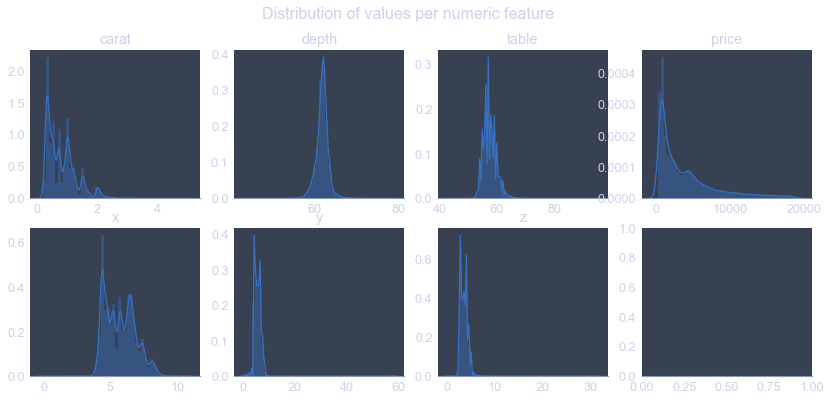

In [7]:
#Preview distribution
fig, axes = plt.subplots(2, 4, figsize=(14,6))
fig.suptitle('Distribution of values per numeric feature', fontsize=16)
for i in range(len(num.columns)):
    sns.distplot(df[num.columns[i]], ax=axes[(i/4),(i%4)])
    axes[(i/4),(i%4)].set_title(num.columns[i])
    axes[(i/4),(i%4)].set_xlabel('')
    axes[(i/4),(i%4)].grid()
plt.grid(False)
sns.despine(left=True)

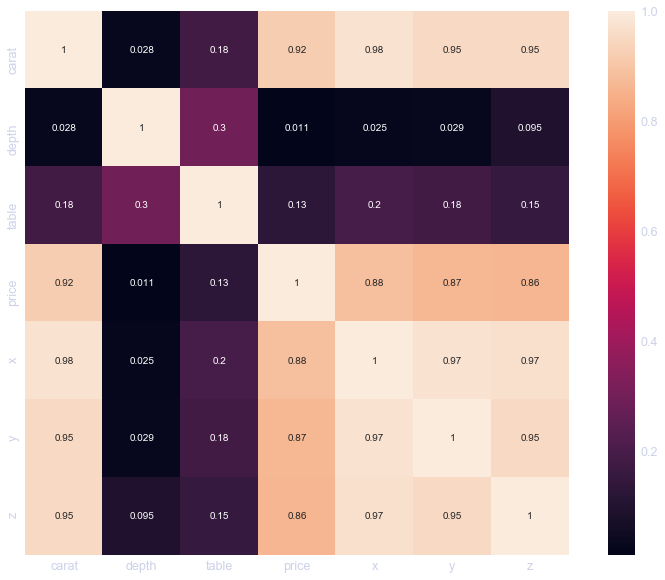

In [8]:
#Check correlation
plt.subplots(figsize=(14,10))
sns.heatmap(abs(df.corr()), square=True, cbar=True, annot=True)

### Observation
1. The dataset has 53940 observations and 10 features, 7 of which are numeric and 3 that are categorical but can be easily transformed to numeric and retain its meaning.
2. There are no missing values.
3. There are 0 values for x, y, and z which doesn't make sense.
4. Most numeric features are right-tailed and not normally distributed.
5. Target feature (price) should be at the end.
6. Carat, the only 4C encoded as numeric, has the highest correlation with price.
7. Depth and table are least correlated with price.

## Data Cleansing
1. Check suspicious rows
2. Translate categorical values to numeric
3. Rearrange columns

### Check suspicious rows

In [9]:
with_0s = df[(df.x==0) | (df.y==0) | (df.z==0)]
print('There are %d suspicious rows.' % with_0s.shape[0])

There are 20 suspicious rows.


This won't be large dent on a dataset with almost 54k rows so we can drop.

In [10]:
#Previous shape
print('Current shape: ' + str(df.shape))

#Drop rows with zeroes
df = df.drop(with_0s.index, axis=0)

#New shape
print('New shape: ' + str(df.shape))

Current shape: (53940, 10)
New shape: (53920, 10)


### Translate categorical values to numeric
1. Cut
2. Color
3. Clarity

#### Cut

In [11]:
df.cut.value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

In [12]:
#Map values into new column
cut_dict = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 
            'Premium' : 4, 'Ideal' : 5}

df['cut_num'] = df.cut.map(cut_dict)
df.cut_num.value_counts()

5    21548
4    13780
3    12081
2     4902
1     1609
Name: cut_num, dtype: int64

#### Color

In [13]:
df.color.value_counts().sort_index()

D     6774
E     9797
F     9538
G    11284
H     8298
I     5421
J     2808
Name: color, dtype: int64

In [14]:
#Map values into new column
color_dict = {'D' : 7, 'E' : 6, 'F' : 5, 'G' : 4, 'H' : 3, 'I' : 2, 'J' : 1}

df['color_num'] = df.color.map(color_dict)
df.color_num.value_counts().sort_index(ascending=False)

7     6774
6     9797
5     9538
4    11284
3     8298
2     5421
1     2808
Name: color_num, dtype: int64

#### Clarity

In [15]:
df.clarity.value_counts().sort_index()

I1        738
IF       1790
SI1     13063
SI2      9185
VS1      8170
VS2     12254
VVS1     3654
VVS2     5066
Name: clarity, dtype: int64

In [16]:
#Map values into new column
clarity_dict = {'FL' : 11, 'IF' : 10, 'VVS1' : 9, 'VVS2' : 8, 'VS1' : 7, 
                'VS2' : 6, 'SI1' : 5, 'SI2' : 4, 'I1' : 3, 'I2' : 2, 'I3' : 1}

df['clarity_num'] = df.clarity.map(clarity_dict)
df.clarity_num.value_counts().sort_index(ascending=False)

10     1790
9      3654
8      5066
7      8170
6     12254
5     13063
4      9185
3       738
Name: clarity_num, dtype: int64

## Feature engineering
1. Volume
2. Roundness
3. Average girdle diameter
4. Depth Percentage

### Volume

In [17]:
df['volume'] = df.x * df.y * df.z

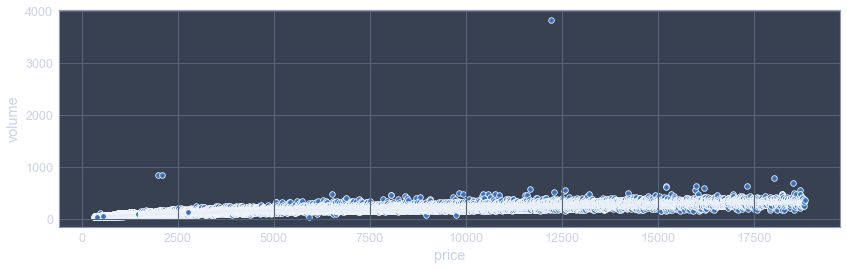

In [18]:
plt.subplots(figsize=(14,4))
sns.scatterplot(x='price', y='volume', data=df)

In [19]:
#Inspect suspicious rows
outliers = df[(df['volume']>750) & (df['price']<12500)]; outliers

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,volume
24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,4,3,4,3840.59806
48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,3,6,7,838.50240
49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,5,6,7,838.50240


We can just drop these 3 rows to better observe trends between price and volume.

In [20]:
#Previous shape
print('Current shape: ' + str(df.shape))

#Drop rows with zeroes
df = df.drop(outliers.index, axis=0)

#New shape
print('New shape: ' + str(df.shape))

Current shape: (53920, 14)
New shape: (53917, 14)


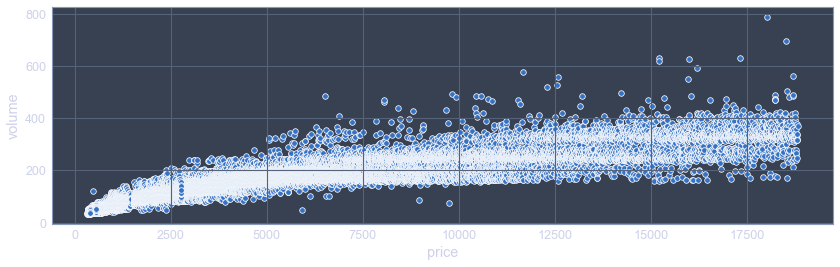

In [21]:
plt.subplots(figsize=(14,4))
sns.scatterplot(x='price', y='volume', data=df)

### Roundness
We want this feature because round diamonds are priced higher. Two diamonds can have the same volume but rounder diamonds will have less carat weight because more have been chipped away during processing. Hence to quantify roundness, we will compare from volume and carat features. 

In [22]:
#Derive roundness
df['roundness'] = df.volume / df.carat

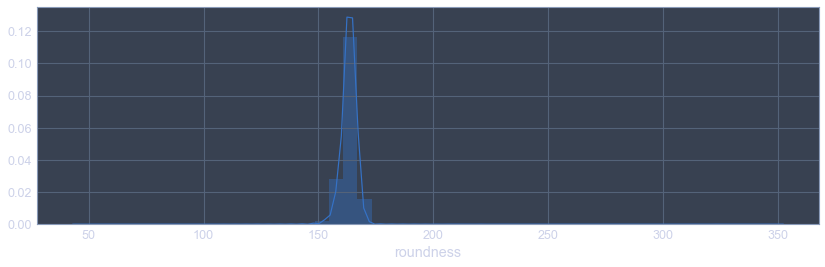

In [23]:
plt.subplots(figsize=(14,4))
sns.distplot(df.roundness)

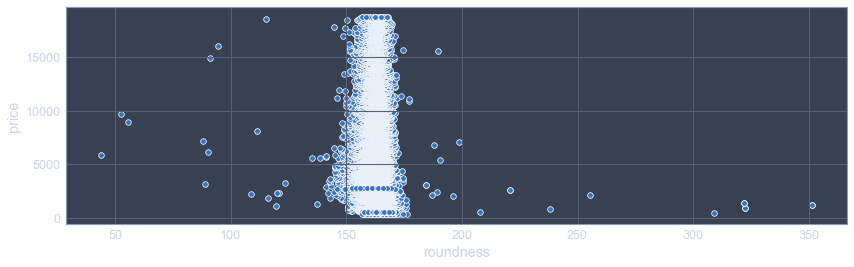

In [24]:
plt.subplots(figsize=(14,4))
sns.scatterplot(x='roundness', y='price', data=df)

### Girdle diameter
Based on the documentation, depth is computed as:

\begin{align*}
depth = \frac{z} {average diameter_(girdle)}
\end{align*}

We already know z and depth, it's easy to get average diameter of girdle.

In [25]:
df['girdle_d'] = df.z / df.depth

### Depth Percentage
In a grading report, there are normally two measurements of depth – the first is the actual depth measurement in millimeters, and the second is the depth percentage, which shows how deep the diamond is in relation to its width.

<br/>

Reference: [1](https://beyond4cs.com/grading/depth-and-table-values/)

In [26]:
df['depth_pcent'] = df.z / df.girdle_d

## Feature selection

In [27]:
#Rearrange columns
target = df.price
df = df.drop(columns=['price'], axis=1)
df = pd.concat(objs=[df, target], axis=1)

#Preview
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_num,color_num,clarity_num,volume,roundness,girdle_d,depth_pcent,price
1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,5,6,4,38.202030,166.095783,0.039512,61.5,326
2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,4,6,5,34.505856,164.313600,0.038629,59.8,326
3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2,6,7,38.076885,165.551674,0.040598,56.9,327
4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,4,2,6,46.724580,161.119241,0.042147,62.4,334
5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2,1,4,51.917250,167.475000,0.043444,63.3,335


In [28]:
#Separate features from target
features = df.drop('price', axis=1)

### Drop redundant columns

In [29]:
#Backup in another dataframe
dimensions = df.loc[:,['x','y','z']]

In [30]:
#Previous shape
print('Current shape: ' + str(df.shape))

#Drop low corr features
df = df.drop(columns=['x', 'y', 'z'], axis=1)

#New shape
print('New shape: ' + str(df.shape))

Current shape: (53917, 17)
New shape: (53917, 14)


### Filter based on correlation

corr_abs = abs(df.corr())

#Mask upper triangle
mask = np.zeros_like(corr_abs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
plt.subplots(figsize=(14,10))

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_abs, mask=mask, square=True, cbar=True, annot=True)

#Filter based on threshold
corr_threshold = 0.15 
cols_to_drop = corr_abs[corr_abs['price'] < corr_threshold].index

cols_to_drop

#Previous shape
print('Current shape: ' + str(df.shape))

#Drop low corr features
df = df.drop(cols_to_drop, axis=1)

#New shape
print('New shape: ' + str(df.shape))

## Exploratory Data Analysis

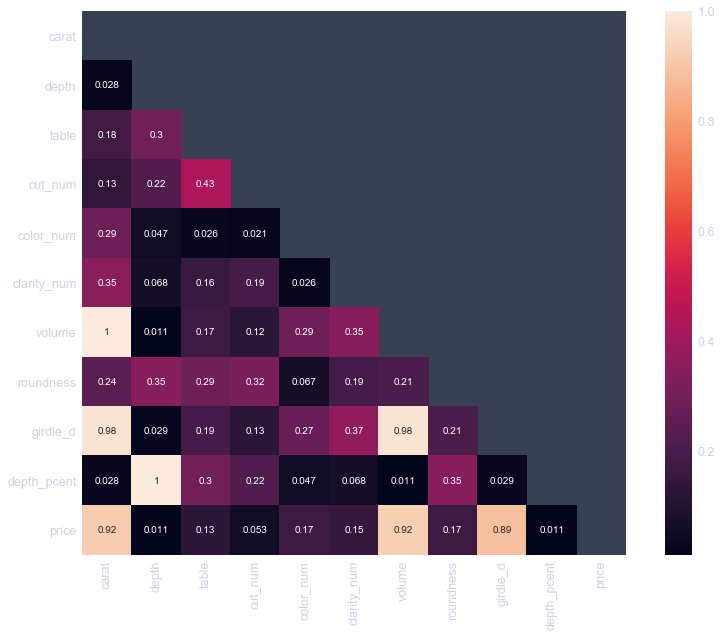

In [31]:
corr_abs = abs(df.corr())

#Mask upper triangle
mask = np.zeros_like(corr_abs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
plt.subplots(figsize=(14,10))

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_abs, mask=mask, square=True, cbar=True, annot=True)

In [32]:
num_cols = corr_abs.index; num_cols

Index([u'carat', u'depth', u'table', u'cut_num', u'color_num', u'clarity_num',
       u'volume', u'roundness', u'girdle_d', u'depth_pcent', u'price'],
      dtype='object')

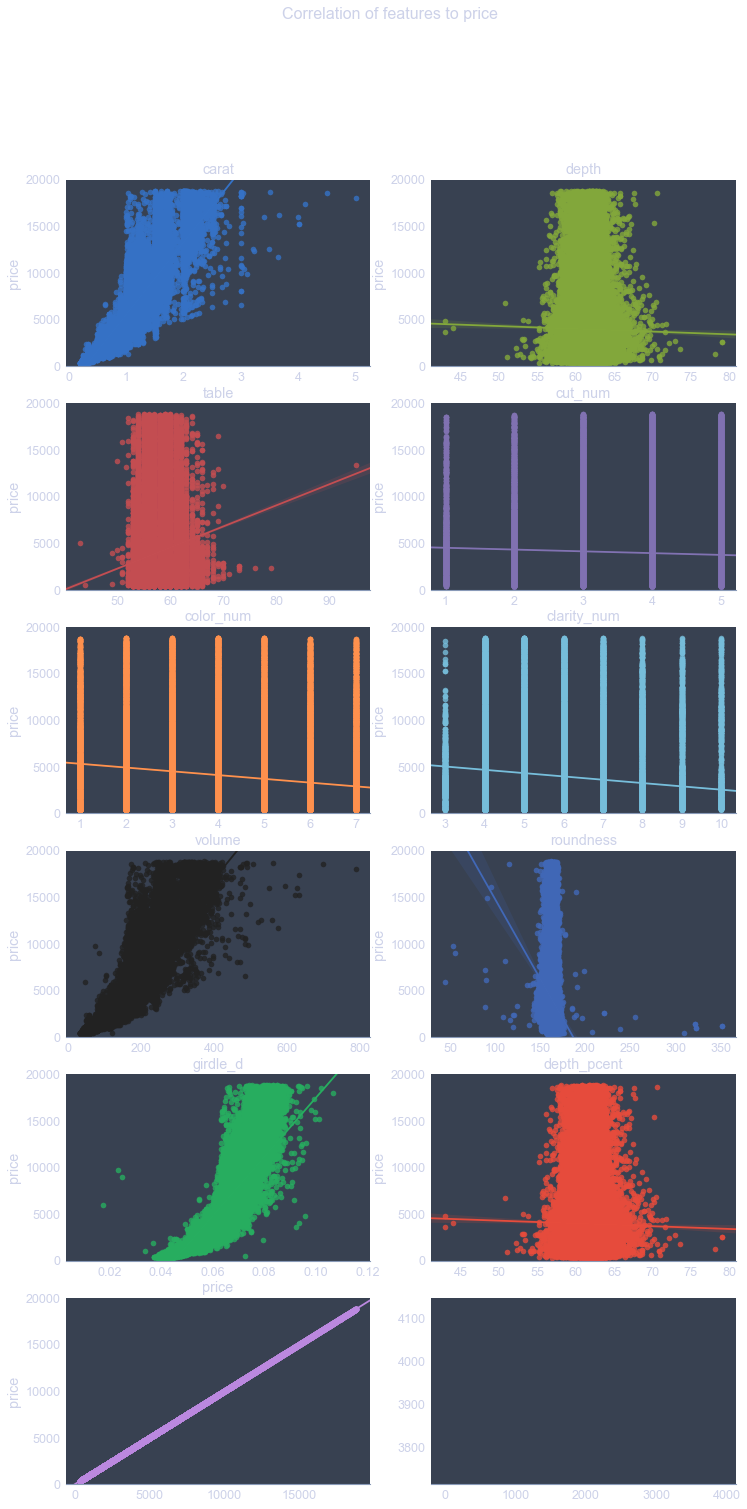

In [33]:
#Trends against price
rows = 6
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(12,24))
fig.suptitle('Correlation of features to price', fontsize=16)
for i in range(len(num_cols)):
    sns.regplot(x=df[num_cols[i]], y=df.price, ax=axes[(i/cols),(i%cols)])
    axes[(i/cols),(i%cols)].set_title(num_cols[i])
    axes[(i/cols),(i%cols)].set_xlabel('')
    axes[(i/cols),(i%cols)].set_ylim(0,20000)
    axes[(i/cols),(i%cols)].grid()
plt.grid(False)
sns.despine(left=True)

#### Cut

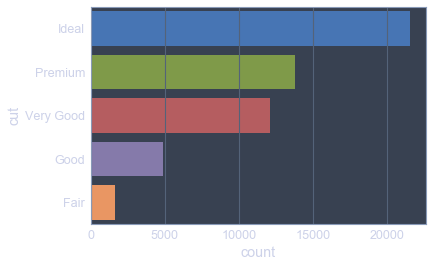

In [34]:
sns.countplot(y = df.cut, order=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])

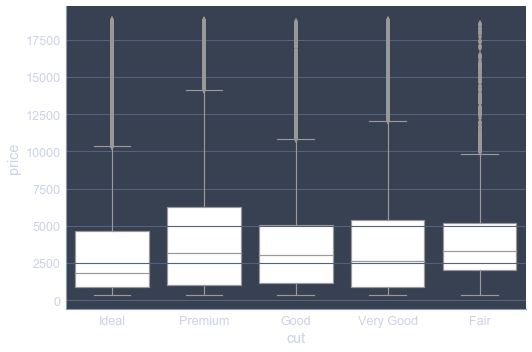

In [35]:
sns.catplot(x='cut', y='price', data=df, kind='box', aspect=1.5, 
            color='white')

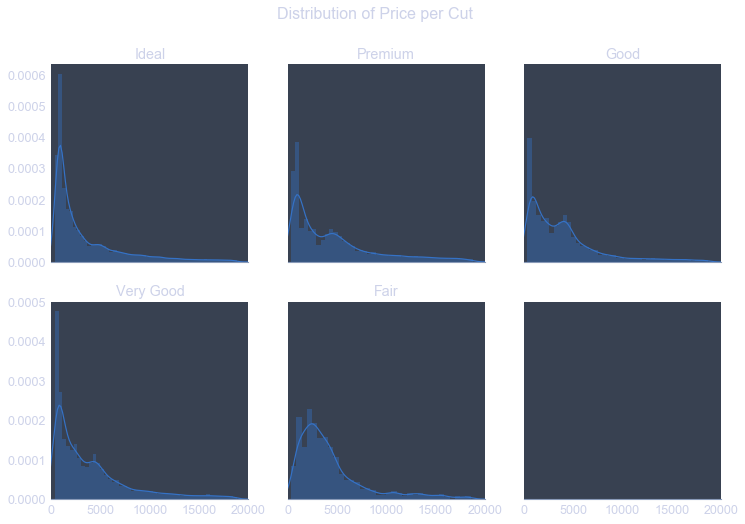

In [36]:
#Dist per category
rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(12,8), sharex='col', sharey='row')
fig.suptitle('Distribution of Price per Cut', fontsize=16)
for i in range(df.cut.nunique()):
    sns.distplot(df['price'][df['cut']==df.cut.unique()[i]], ax=axes[(i/cols),(i%cols)])
    axes[(i/cols),(i%cols)].set_title(df.cut.unique()[i])
    axes[(i/cols),(i%cols)].set_xlabel('')
    axes[(i/cols),(i%cols)].set_xlim(0,20000)
    axes[(i/cols),(i%cols)].grid()
plt.grid(False)
sns.despine(left=True)

#### Color

In [37]:
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

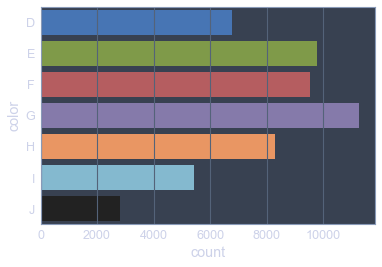

In [38]:
sns.countplot(y = df.color, order=colors)

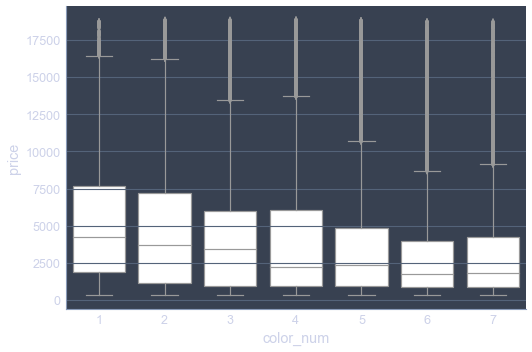

In [39]:
sns.catplot(x='color_num', y='price', data=df, kind='box', aspect=1.5, 
            color='white')

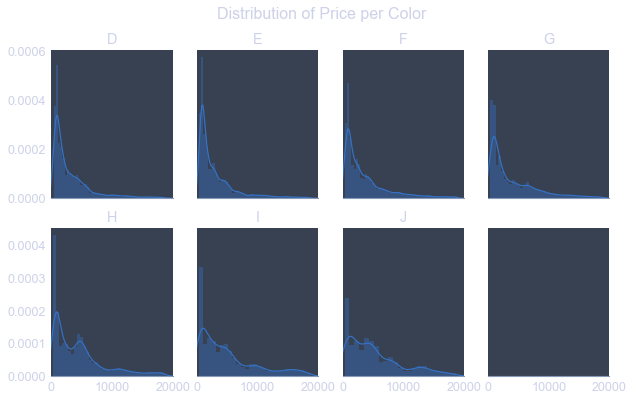

In [40]:
#Dist per category
rows = 2
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(10,6), sharex='col', sharey='row')
fig.suptitle('Distribution of Price per Color', fontsize=16)
for i in range(df.color.nunique()):
    sns.distplot(df['price'][df['color']==colors[i]], ax=axes[(i/cols),(i%cols)])
    axes[(i/cols),(i%cols)].set_title(colors[i])
    axes[(i/cols),(i%cols)].set_xlabel('')
    axes[(i/cols),(i%cols)].set_xlim(0,20000)
    axes[(i/cols),(i%cols)].grid()
plt.grid(False)
sns.despine(left=True)

#### Clarity

In [41]:
clarities = ['FL','IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 
             'I2', 'I3']

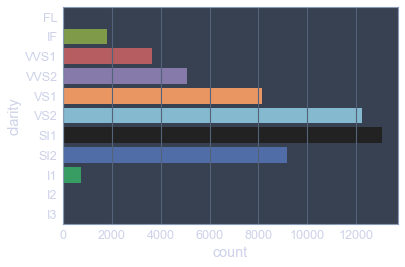

In [42]:
sns.countplot(y = df.clarity, order=clarities)

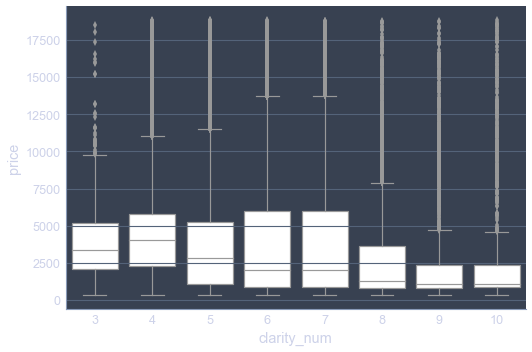

In [43]:
sns.catplot(x='clarity_num', y='price', data=df, kind='box', aspect=1.5, 
            color='white')

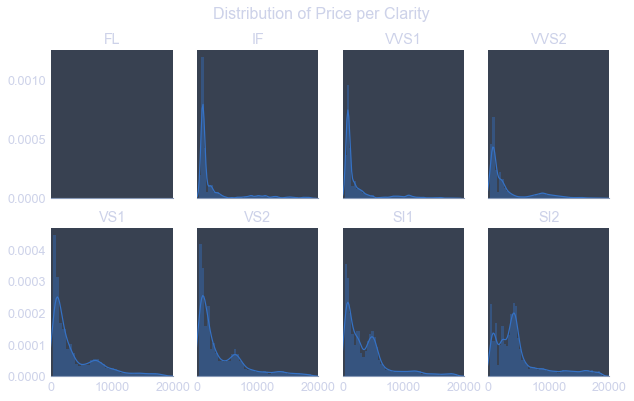

In [44]:
#Dist per category
rows = 2
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(10,6), sharex='col', sharey='row')
fig.suptitle('Distribution of Price per Clarity', fontsize=16)
for i in range(df.clarity.nunique()):
    sns.distplot(df['price'][df['clarity']==clarities[i]], ax=axes[(i/cols),(i%cols)])
    axes[(i/cols),(i%cols)].set_title(clarities[i])
    axes[(i/cols),(i%cols)].set_xlabel('')
    axes[(i/cols),(i%cols)].set_xlim(0,20000)
    axes[(i/cols),(i%cols)].grid()
plt.grid(False)
sns.despine(left=True)

#### Dimensions

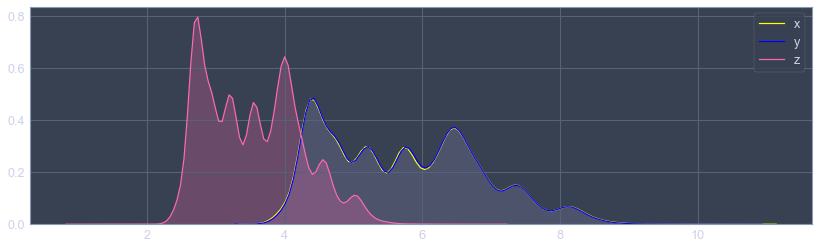

In [45]:
plt.subplots(figsize=(14,4))
sns.kdeplot(dimensions['x'], shade=True, color='yellow' )
sns.kdeplot(dimensions['y'], shade=True, color='blue' )
sns.kdeplot(dimensions['z'], shade= True, color='hotpink')

x and y appear to be the same. We can inspect:

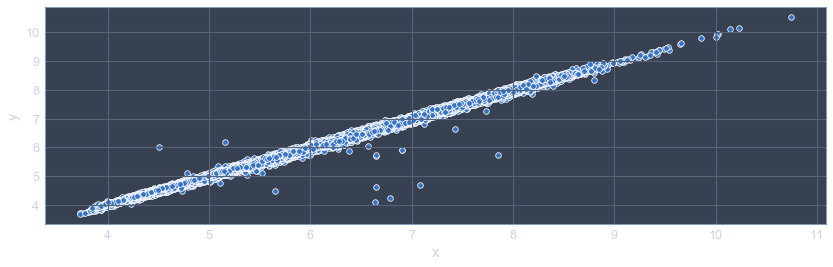

In [46]:
plt.subplots(figsize=(14,4))
sns.scatterplot(x='x', y='y', data=dimensions)

**Observations:**
1. Three features correlate with price exponentially. These are carat, volume, girdle_d. These are all related to size/weight. The larger the diamond, the rarer it is, and therefore costs more.
2. Contrary to expectation, 3Cs (cut, clarity, color) do not have strong positive correlation with price. Better ratings were encoded as larger numbers but the regression line approached the x axes instead.
3. Cut
    * **Premium** cut is the most expensive but also has more varied price. **Very Good** follows closely.
    * **Ideal** cut, the best in this category, has surprisingly lower prices but has the most outliers-- outrageously expensive diamonds.
    * **Fair** can be more expensive than Ideal and Good on average but it has the most cheaper diamonds (below 25k) than others.
    * There is a class imbalance. **Good** and **Fair** in particular are not  represented well.
4. Color
    * Similar to cut, colorless diamonds unexpectedly cost lower than tinted ones on average.
    * __I__ and **J**, which has the most tint, have more expensive diamonds than clear ones (ie: D, E, F). Possibly fancy color diamonds such as pink.
    * Has a better class balance than cut.
5. Clarity
    * Has a relatively normal distribution.
    * Least clear diamonds (**SI2 aka some inclusions 2**) has the most expensive diamonds.
6. For the same depth, depth_pcent, and roundness, prices can vary heavily but there's slope is steepest for roundness.
7. Length and width of diamonds are mostly equal with few deviants.

## Building Models

In [47]:
df.describe()

,carat,depth,table,cut_num,color_num,clarity_num,volume,roundness,girdle_d,depth_pcent,price
count,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000
mean,0.797687,61.749565,57.456939,3.904223,4.405939,6.051505,129.802460,163.293915,0.057326,61.749565,3930.910474
std,0.473777,1.432318,2.234069,1.116593,1.701281,1.647017,76.450353,3.941814,0.011162,1.432318,3987.215003
min,0.200000,43.000000,43.000000,1.000000,1.000000,3.000000,31.707984,44.155400,0.017657,43.000000,326.000000
25%,0.400000,61.000000,56.000000,3.000000,3.000000,5.000000,65.188530,161.548770,0.047179,61.000000,949.000000
50%,0.700000,61.800000,57.000000,4.000000,4.000000,6.000000,114.840180,163.478329,0.057029,61.800000,2401.000000
75%,1.040000,62.500000,59.000000,5.000000,6.000000,7.000000,170.844704,165.337756,0.065366,62.500000,5323.000000
max,5.010000,79.000000,95.000000,5.000000,7.000000,10.000000,790.133208,351.217152,0.106565,79.000000,18823.000000


In [48]:
#Identify target and predictors
x = features.drop(['cut', 'color', 'clarity'], axis=1)
y = target

In [49]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

### Performance Metrics

In [50]:
#Store model performance metrics
models = {'Linear' : LinearRegression(), 
          'Lasso' : Lasso(), 
          'Ridge' : Ridge(), 
          'Elastic Net' : ElasticNet(), 
          'AdaBoost' : AdaBoostRegressor(), 
          'Gradient Boost' : GradientBoostingRegressor(), 
          'XGBoost' : XGBRegressor(), 
          'Decision Tree' : DecisionTreeRegressor(), 
          'Random Forest' : RandomForestRegressor(), 
          'K Neighbors' : KNeighborsRegressor()}

scores = pd.DataFrame(index=models.keys(), 
                      columns=['Accuracy', 'MAE', 'MSE', 'R2', 'Cross Val'])
scores

,Accuracy,MAE,MSE,R2,Cross Val
Decision Tree,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN
Ridge,NaN,NaN,NaN,NaN,NaN
Linear,NaN,NaN,NaN,NaN,NaN
Gradient Boost,NaN,NaN,NaN,NaN,NaN
K Neighbors,NaN,NaN,NaN,NaN,NaN
Elastic Net,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN
AdaBoost,NaN,NaN,NaN,NaN,NaN
Lasso,NaN,NaN,NaN,NaN,NaN


### Pipeline

NameError: name 'key' is not defined

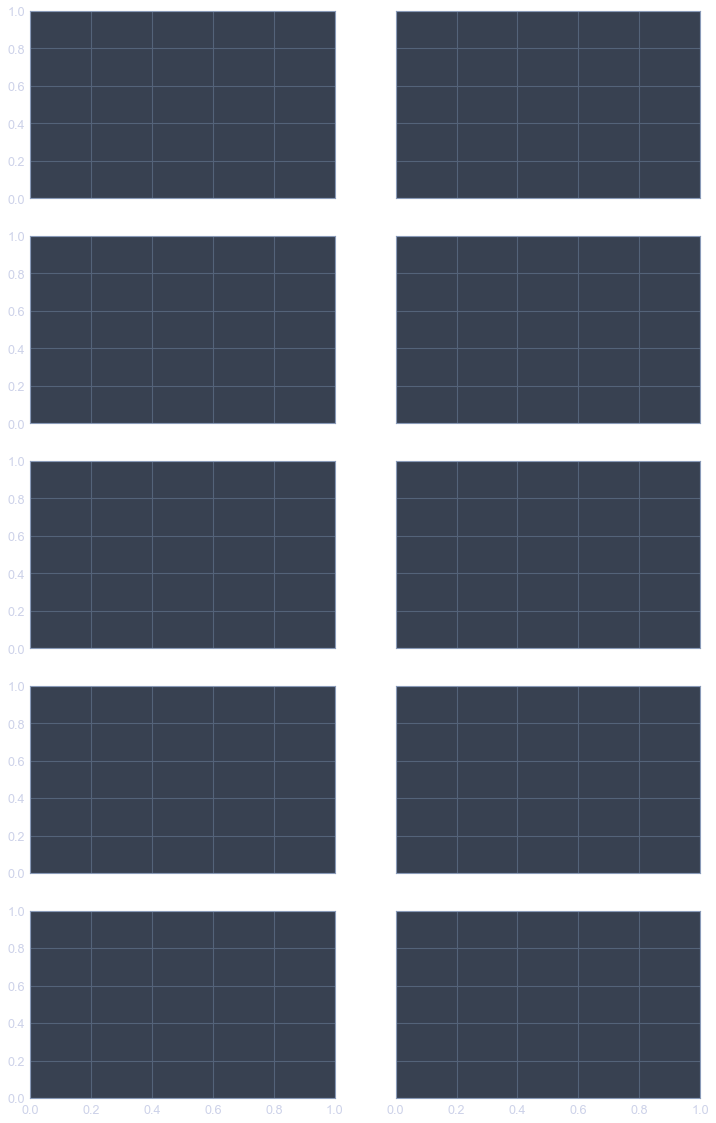

In [51]:
cols = 2
rows = len(scores.index.tolist())/cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4), 
                         sharex='col', sharey='row')

for i in range(len(scores.index.tolist())):
    #Create pipeline
    pipeline = Pipeline(steps=[('scaler', StandardScaler()), 
                               (models.keys()[i], models[models.keys()[i]])])

    #Preprocessing of training data, fit model 
    pipeline.fit(x_train, y_train)

    #Preprocessing of validation data, get predictions
    y_pred = pipeline.predict(x_test)

    #Store scores in dataframe
    scores.loc[models.keys()[i], 'Accuracy'] = pipeline.score(x_test,y_test)*100
    scores.loc[models.keys()[i], 'MAE'] = mean_absolute_error(y_test, y_pred)
    scores.loc[models.keys()[i], 'MSE'] = mean_squared_error(y_test, y_pred)
    scores.loc[models.keys()[i], 'R2'] = r2_score(y_test, y_pred)
    scores.loc[models.keys()[i], 'Cross Val'] = np.mean(cross_val_score(models[key], x, y, cv=10))
    
    #Visualize
    sns.regplot(x=y_test, y=y_pred, ax=axes[(i/cols),(i%cols)], fit_reg=False, 
                scatter_kws={'color' : 'hotpink', 'alpha' : 0.25})
    axes[(i/cols),(i%cols)].set_title(models.keys()[i])
    axes[(i/cols),(i%cols)].set_xlabel('')
    axes[(i/cols),(i%cols)].set_xlim(0,20000)
    axes[(i/cols),(i%cols)].set_ylim(0,20000)
    axes[(i/cols),(i%cols)].grid(False)
    sns.despine(left=True)

In [ ]:
scores

### Best Model: Random Forest

## Parameter Optimization